c:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\BYANG4EVER\AppData\Local\Temp\ipykernel_9356\3005960191.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries.geometries_from_point(point, dist=dist, tags={'building':True})
c:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Inward offset...
Generating input point array...
Generating Voronoi diagram...
Generating GeoDataFrame...
Dissolving Voronoi polygons...


C:\Users\BYANG4EVER\AppData\Local\Temp\ipykernel_9356\3005960191.py:14: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should  be edited. `unique_id` of affected elements: [1464, 193, 38, 1587, 362, 481, 379, 471, 361, 410, 10, 467, 473, 462, 468, 385, 335, 365, 464, 445, 367, 209, 436, 401, 1139, 1138, 426, 402, 439, 447, 443, 714, 1149, 326, 1312, 13, 320, 315, 219, 2, 322, 313, 1457, 368, 477, 316, 16, 459, 430, 1095, 1091, 1093, 1092, 1094, 14, 321, 308, 1033, 1034, 939, 946, 940, 935, 942, 931, 943, 1313, 360, 416, 450, 358, 1456, 314, 424, 456, 421, 376, 384, 211, 380, 435, 413, 408, 425, 458, 371, 451, 466, 452, 457, 429, 441, 465, 446, 449, 433, 363, 378, 460, 417, 454, 453, 1113, 438, 370, 437, 1084, 1109, 1080, 1552, 993, 991, 992, 483, 484, 479, 1137, 1126, 1114, 1124, 1145, 1067, 1125, 1119, 1123, 1066, 1059, 1144, 1143, 503, 11, 956, 965, 955, 964, 847, 1576, 851, 844, 845, 824, 854, 853, 792, 852, 802, 810, 1578, 888, 883, 892, 1172, 1171, 680, 

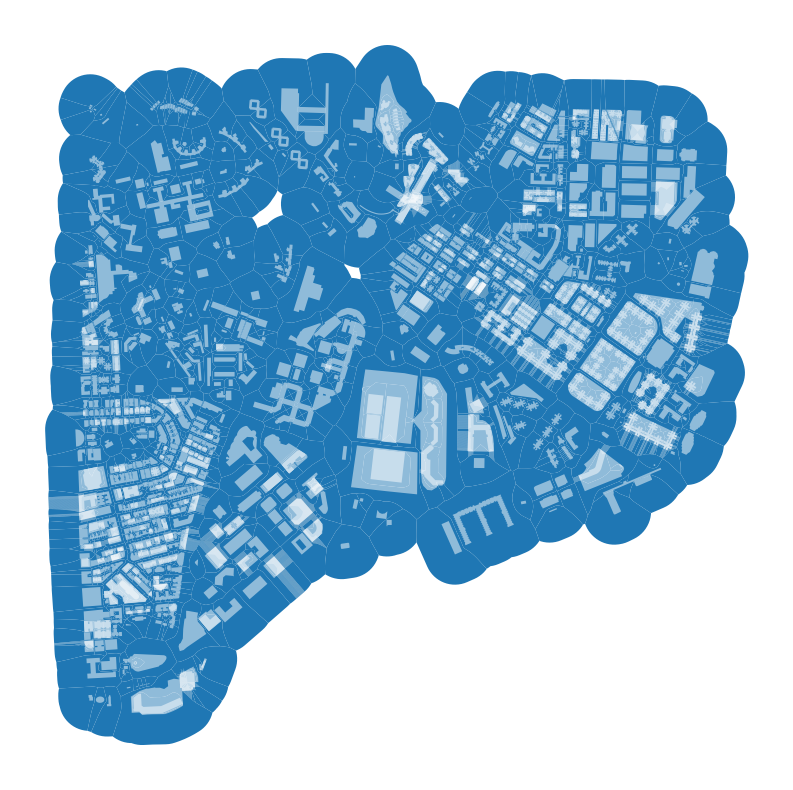

In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox

point = (22.3031874, 114.1820106)
dist = 1000
gdf = ox.geometries.geometries_from_point(point, dist=dist, tags={'building':True})
gdf_projected = ox.projection.project_gdf(gdf)
buildings = gdf_projected[gdf_projected.geom_type.isin(['Polygon', 'MultiPolygon'])]

buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tess = momepy.Tessellation(buildings, unique_id='uID', limit=limit)
tessellation = tess.tessellation

f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax)
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

c:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


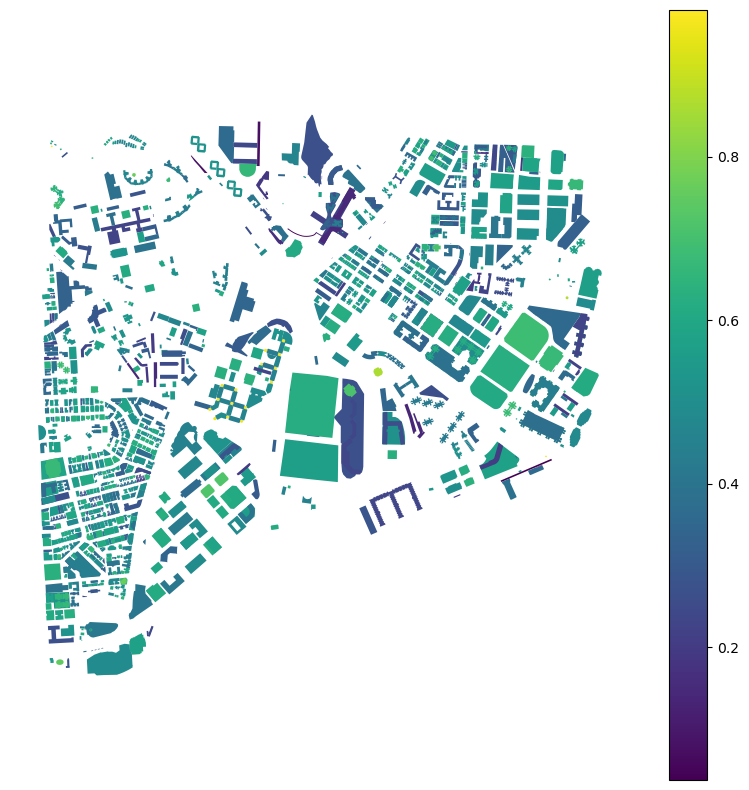

In [2]:
import numpy as np

blg_cc = momepy.CircularCompactness(buildings)
buildings['circular_com'] = blg_cc.series

f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='circular_com', legend=True, cmap='viridis')
ax.set_axis_off()
plt.show()

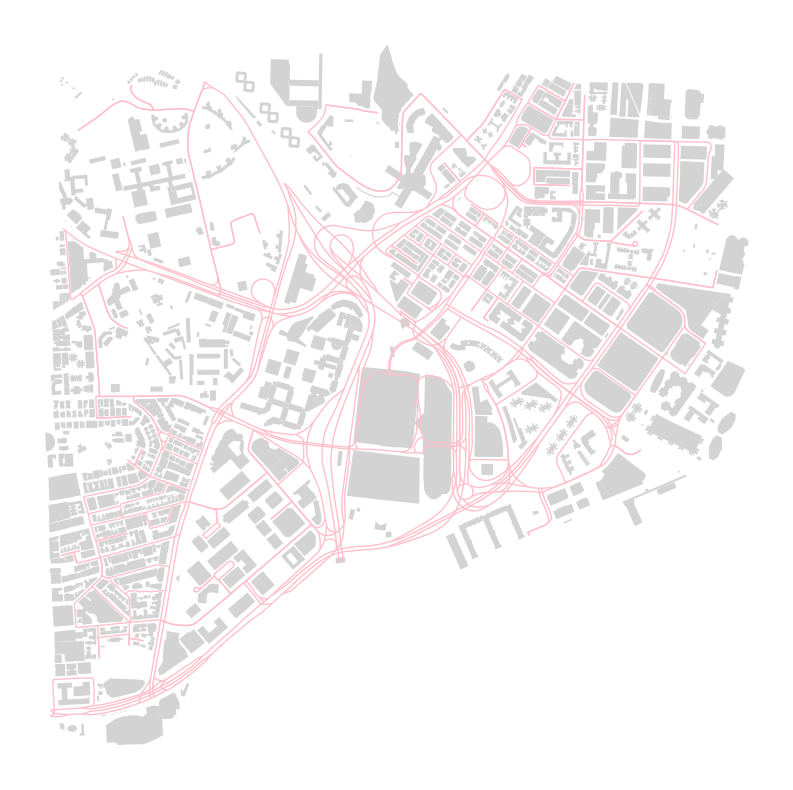

In [7]:
wurster_hall = (22.3031874, 114.1820106)
one_mile = 1000
streets_graph = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
streets_graph = ox.projection.project_graph(streets_graph)
edges = ox.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, color='pink', linewidth=1)
buildings.plot(ax=ax, color='lightgrey')
ax.set_axis_off()
plt.show()

100%|██████████| 1603/1603 [00:00<00:00, 3997.61it/s]
c:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\BYANG4EVER\.conda\envs\python_igraph\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


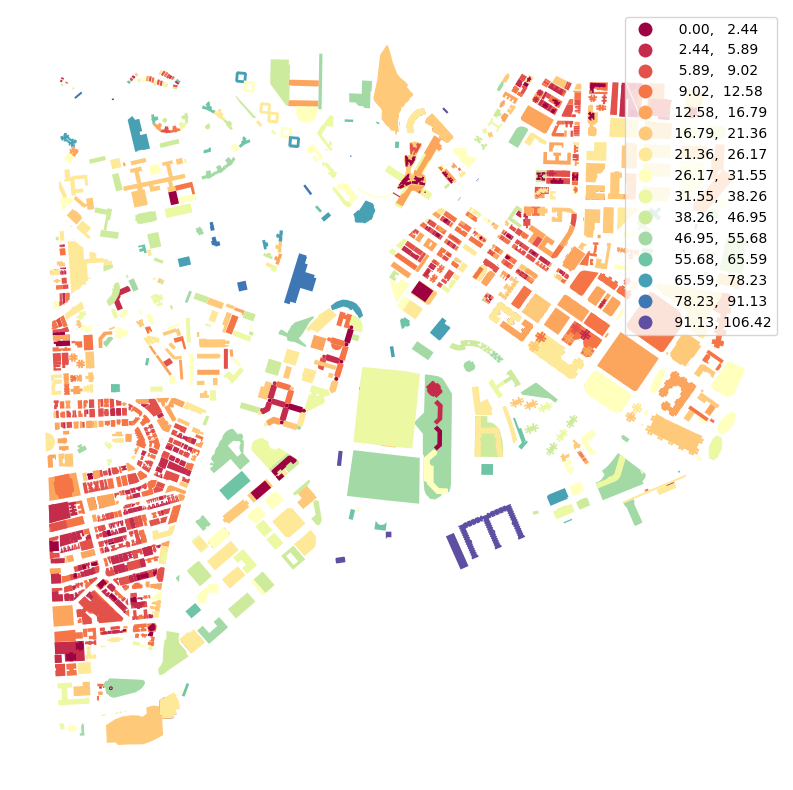

In [3]:
#距离
sw1 = momepy.sw_high(k=1, gdf=tessellation, ids='uID')
buildings['neighbour_dist'] = momepy.NeighborDistance(buildings, sw1, 'uID').series
buildings = buildings.dropna(subset=['neighbour_dist'])
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='neighbour_dist', scheme='naturalbreaks', k=15, legend=True, cmap='Spectral')
ax.set_axis_off()
plt.show()

100%|██████████| 1603/1603 [00:00<00:00, 2981.46it/s]


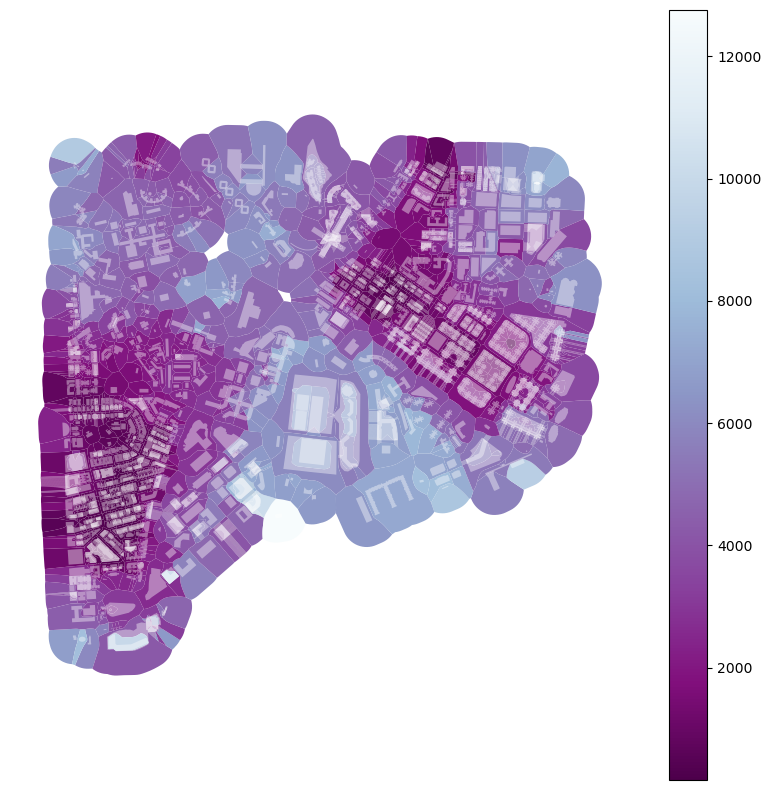

In [27]:
sw3 = momepy.sw_high(k=3, gdf=tessellation, ids='uID')
tessellation['area'] = momepy.Area(tessellation).series
area_iqr = momepy.Range(tessellation, values='area',
                        spatial_weights=sw3, unique_id='uID',
                        rng=(25, 75))
tessellation['area_IQR'] = area_iqr.series
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_IQR', legend=True, cmap='BuPu_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

100%|██████████| 1603/1603 [00:00<00:00, 2807.07it/s]


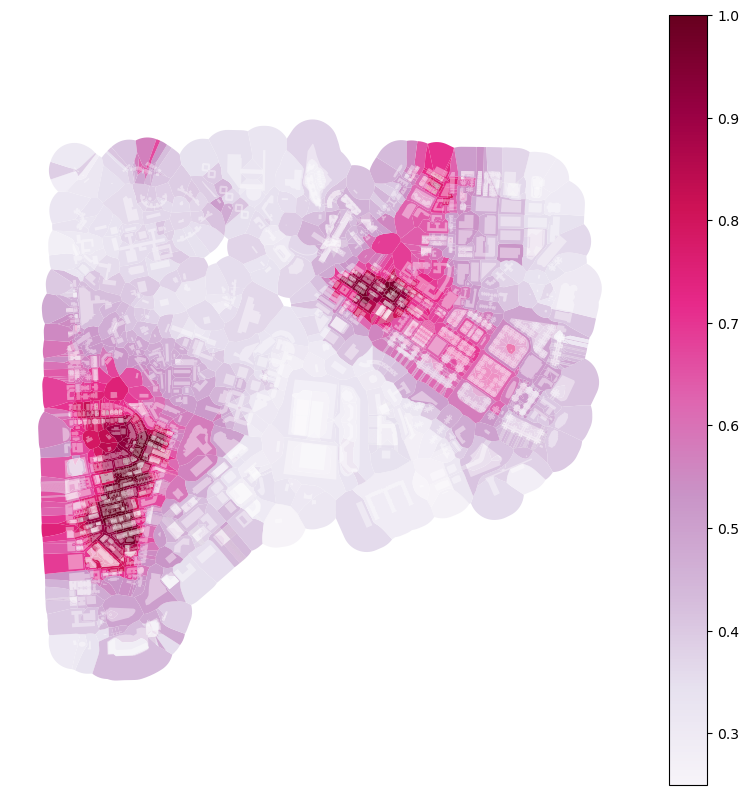

In [12]:
area_simpson = momepy.Simpson(tessellation, values='area',
                              spatial_weights=sw3,
                              unique_id='uID')
tessellation['area_simpson'] = area_simpson.series
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_simpson', legend=True, cmap='PuRd')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

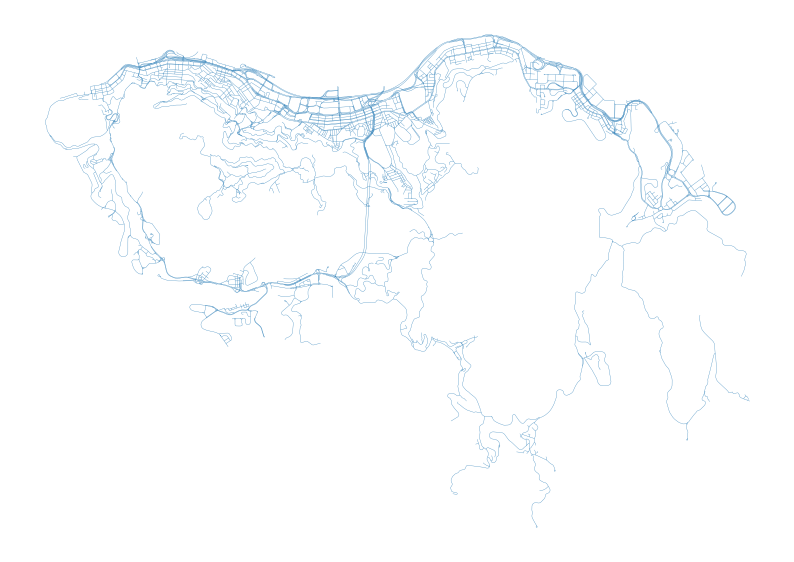

In [16]:
streets_graph = ox.graph_from_place('香港岛', network_type='drive')
streets_graph = ox.projection.project_graph(streets_graph)
edges = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

100%|██████████| 3037/3037 [00:01<00:00, 1775.51it/s]


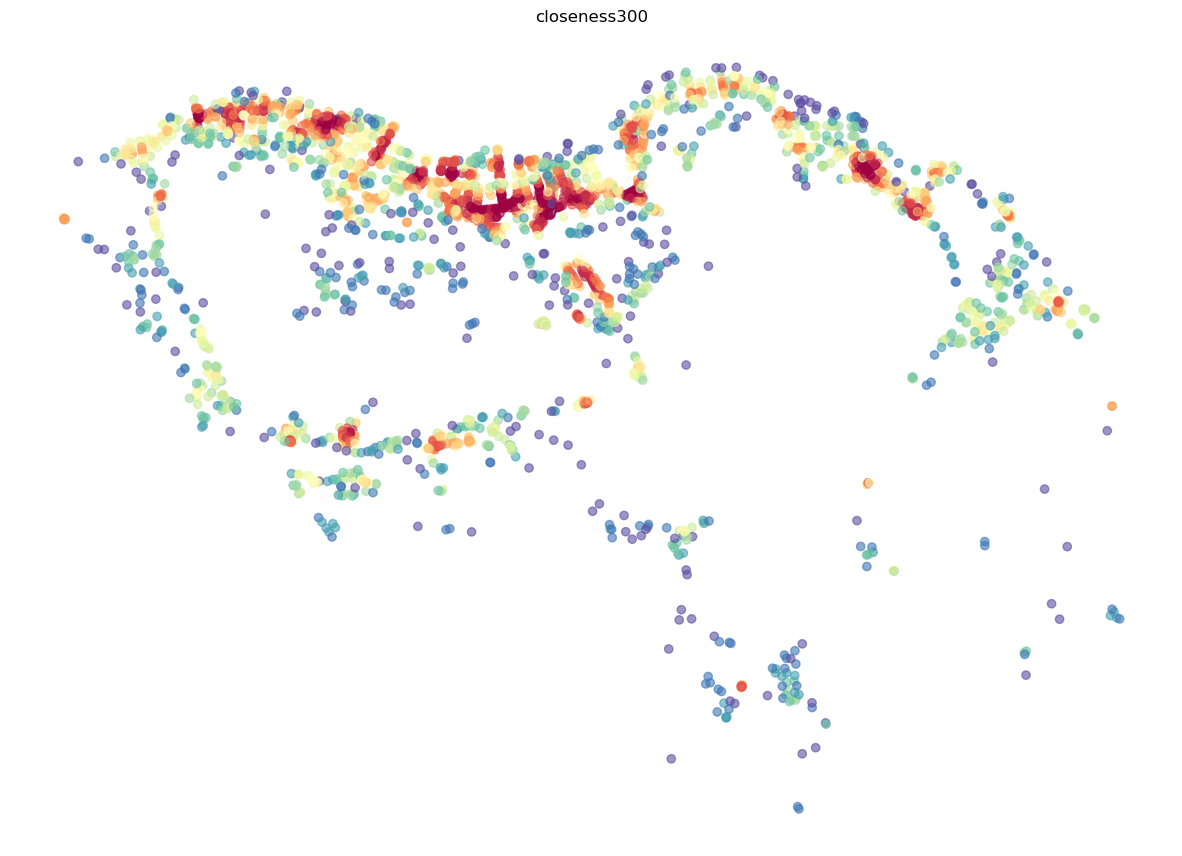

In [23]:
primal = momepy.gdf_to_nx(edges, approach='primal')
primal = momepy.closeness_centrality(primal, radius=300, name='closeness300', distance='mm_len', weight='mm_len')
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness300', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness300')
plt.show()


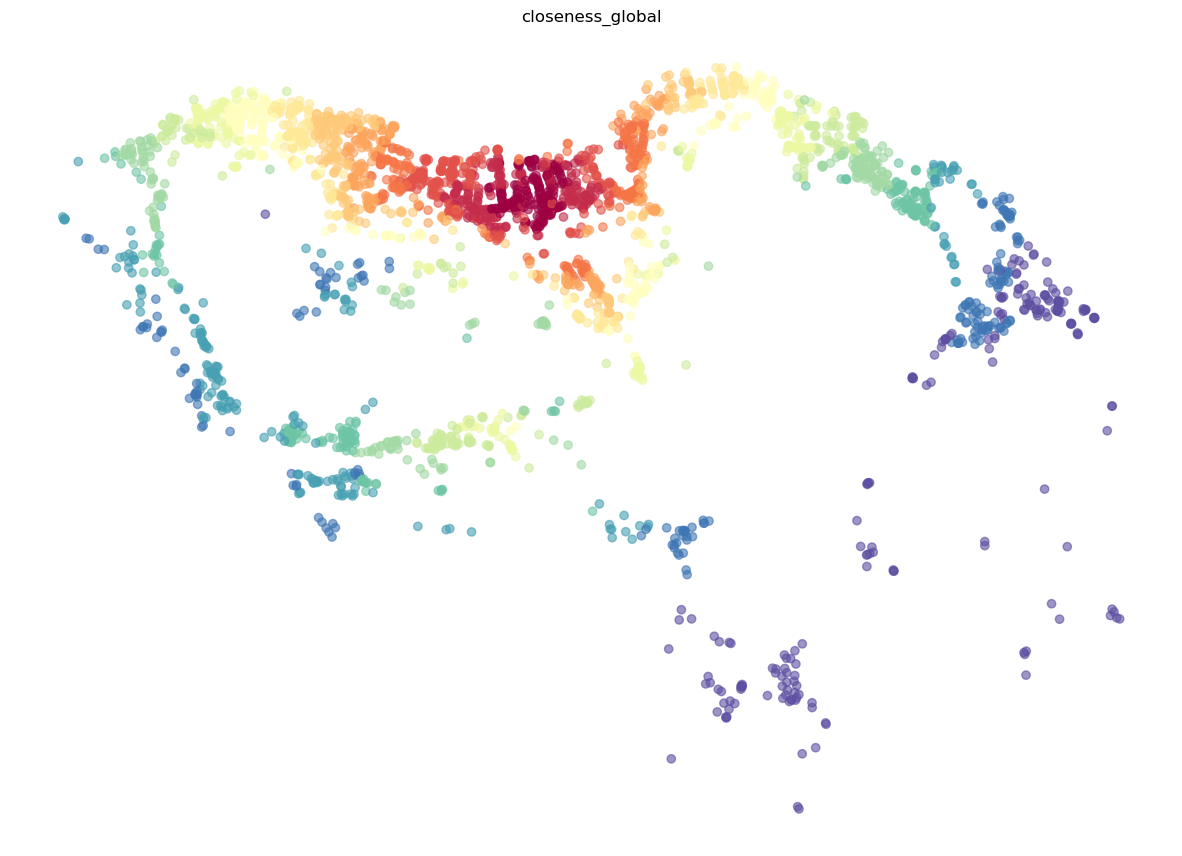

In [19]:
primal = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness_global')
plt.show()

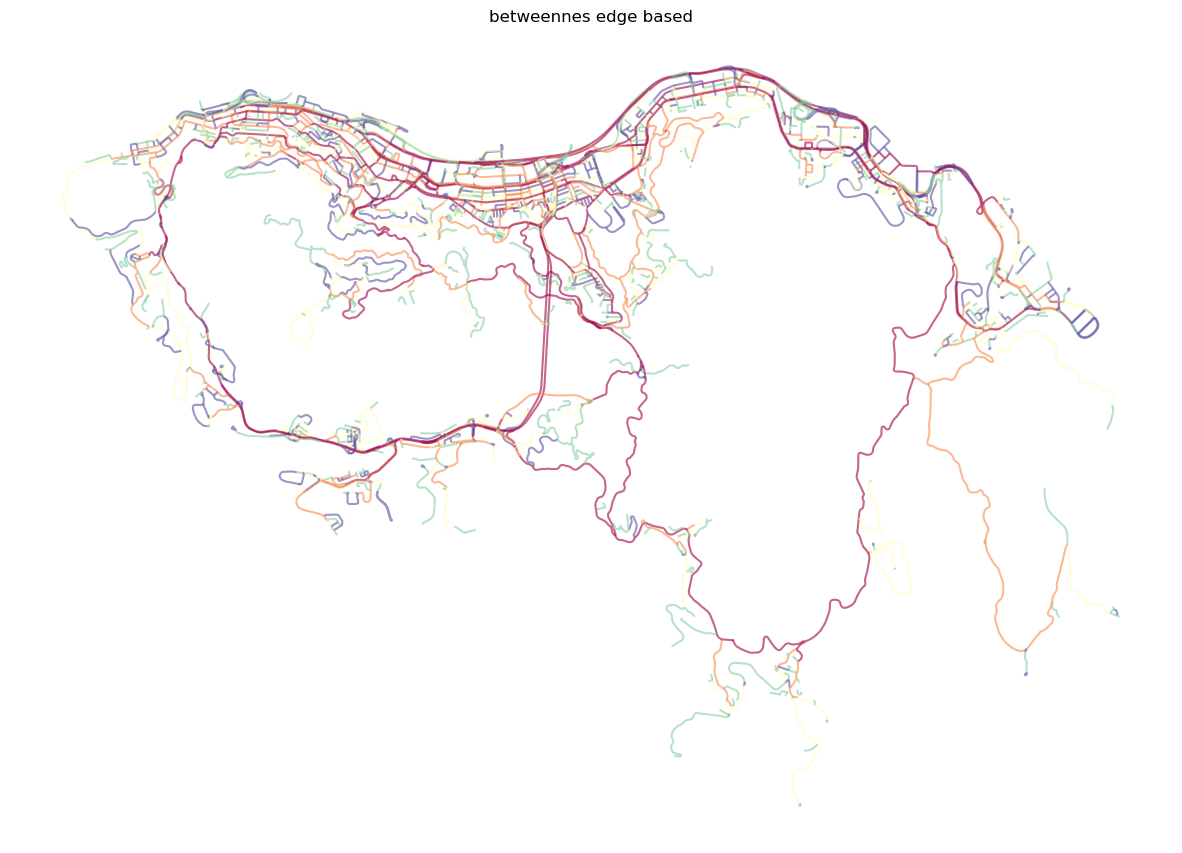

In [25]:
primal = momepy.betweenness_centrality(primal, name='betweenness_metric_e', mode='edges', weight='mm_len')
primal_gdf = momepy.nx_to_gdf(primal, points=False)
f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='betweenness_metric_e', cmap='Spectral_r', scheme='quantiles', alpha=0.6)
ax.set_axis_off()
ax.set_title('betweennes edge based')
plt.show()